In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset('iris')

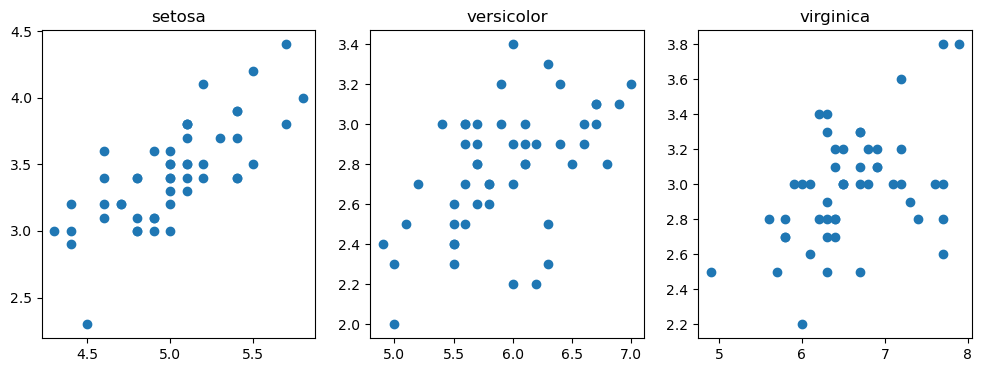

In [2]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.scatter(iris[iris.species== 'setosa'].sepal_length, iris[iris.species == 'setosa'].sepal_width)
plt.title('setosa')
plt.subplot(1,3,2)
plt.scatter(iris[iris.species== 'versicolor'].sepal_length, iris[iris.species == 'versicolor'].sepal_width)
plt.title('versicolor')
plt.subplot(1,3,3)
plt.scatter(iris[iris.species== 'virginica'].sepal_length, iris[iris.species == 'virginica'].sepal_width)
plt.title('virginica')
plt.show()

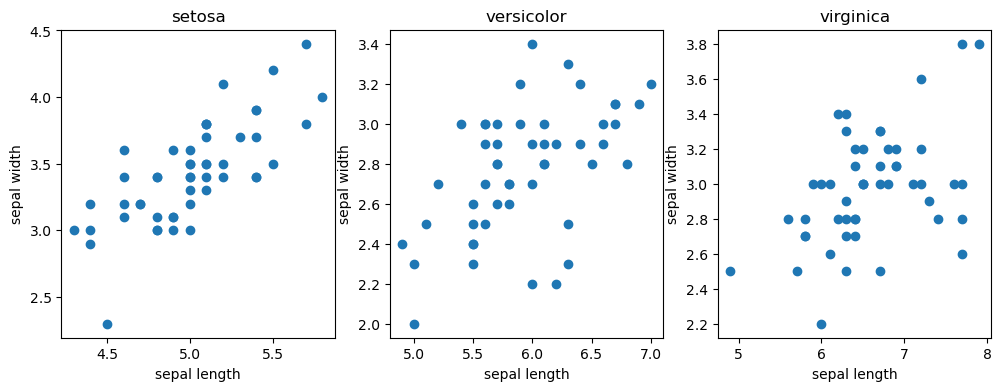

In [3]:
plt.figure(figsize=(12,4))
for i, species in enumerate(iris.species.unique()): 
    plt.subplot(1,3,i+1)
    plt.scatter(iris[iris.species== species].sepal_length, iris[iris.species == species].sepal_width)
    plt.title(species), plt.xlabel('sepal length'), plt.ylabel('sepal width')
plt.show()

- Anscombe's Quartet

In [5]:
ans = sns.load_dataset('anscombe')
ans.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


In [6]:
ans.tail(3)

,dataset,x,y
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [7]:
ans.groupby('dataset')['x'].agg(['mean', 'std'])

,mean,std
dataset,,
I,9.0,3.316625
II,9.0,3.316625
III,9.0,3.316625
IV,9.0,3.316625


In [8]:
ans.pivot_table('y','dataset', aggfunc=['mean','std'])

,mean,std
,y,y
dataset,,
I,7.500909,2.031568
II,7.500909,2.031657
III,7.500000,2.030424
IV,7.500909,2.030579


In [9]:
# 회귀식: y = 0.5 * x + 3

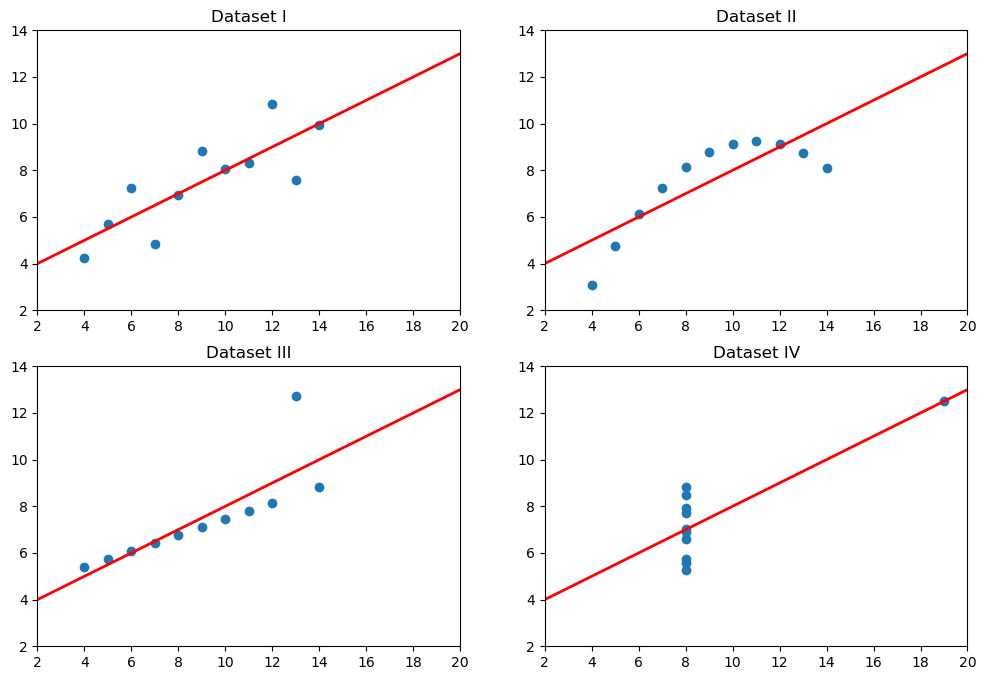

In [11]:
plt.figure(figsize=(12,8))

for i, roman in enumerate(ans.dataset.unique()):            #['I','II','III','IV']
    ds = ans[ans.dataset == roman]
    plt.subplot(2, 2, i+1)
    plt.scatter(ds.x, ds.y, marker='o')
    plt.plot([2, 20], [4,13], 'r-', lw=2)                   # 회귀식: y = 0.5 * x + 3 
    plt.xlim(2,20), plt.ylim(2,14)
    plt.title(f'Dataset {roman}')
plt.show()

2. subplots

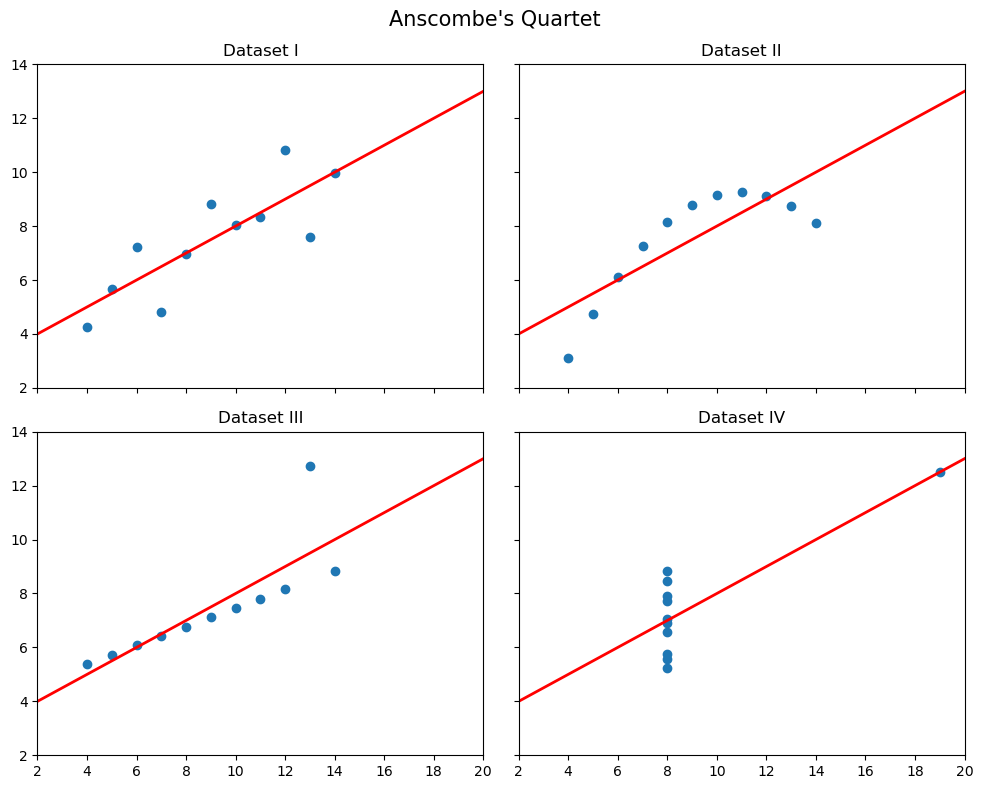

In [14]:
fig, axes= plt.subplots(2, 2, figsize=(10,8), sharex=True, sharey=True)
for i, roman in enumerate(ans.dataset.unique()):            #['I','II','III','IV']
    ds = ans[ans.dataset == roman]
    ax = axes[i // 2, i % 2]                             # 행, 열 인덱스
    ax.scatter(ds.x, ds.y, marker='o')
    ax.plot([2, 20], [4,13], 'r-', lw=2)                   # 회귀식: y = 0.5 * x + 3 
    ax.set_xlim(2, 20), ax.set_ylim(2, 14)
    ax.set_title(f'Dataset {roman}')
fig.suptitle("Anscombe's Quartet", fontsize=15)
plt.tight_layout()
plt.show()